## Softmax

In [1]:
import numpy as np

In [19]:
vector = np.array([11231, 999, 123142])

In [28]:
vector = np.array([-10, 10, 24])

In [33]:
def softmax(vec):
    vec -= np.max(vec)
    exp = np.exp(vec)
    return exp / np.sum(exp)

In [32]:
softmax(vector)

array([1.71390701e-15, 8.31528028e-07, 9.99999168e-01])

## Assignment-04 基于维基百科的词向量构建

在本章，你将使用Gensim和维基百科获得你的第一批词向量，并且感受词向量的基本过程。

![](https://www.kaggleusercontent.com/kf/1018109/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..JNNggcCCDcYEypvp7ZDwOA.cM9CuDpuCKo0K_ZkMFLAUvhfip0P6SRZ4LddwgTtgwz8pQy1dZeGVJWi6u81KSpAFNSi7YximVVJbPw8xsFySdWlqoUwvSER-LLIRfmlpsCvtDt90NaLYT2FHlwl0tfF-1MKtiFsWlGQ8LGo40hL3ccBSwMZy214kGJf9bNkW_g.kZbF5sgN5qha3zhjilfSDg/__results___files/__results___9_0.png)

## Step-01: Download Wikipedia Chinese Corpus: https://dumps.wikimedia.org/zhwiki/20190720/

第一步：使用维基百科下载中文语料库

## Step-02: Using https://github.com/attardi/wikiextractor to extract the wikipedia corpus

第二步：使用python wikipedia extractor抽取维基百科的内容

In [ ]:
import train_vec

save_sentence_from_json("F:/other/py/NLPHomework/Assignment-04/out/")

## Step-03: Using gensim get word vectors: 

Reference: 

+ https://radimrehurek.com/gensim/models/word2vec.html
+ https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

第三步：参考Gensim的文档和Kaggle的参考文档，获得词向量。 注意，你要使用Jieba分词把维基百科的内容切分成一个一个单词，然后存进新的文件中。然后，你需要用Gensim的LineSentence这个类进行文件的读取。

在训练成词向量Model.

In [ ]:
train_vector("F:/other/py/NLPHomework/Assignment-04/out/")

## Step-04: Using some words to test your preformance. 

第四步，测试同义词，找几个单词。

In [2]:
from gensim.models import Word2Vec

model = Word2Vec.load('./out/wiki.model')
word_vectors = model.wv
del model

In [5]:
word_vectors.most_similar('相对论')

[('量子力学', 0.8034210205078125),
 ('量子场论', 0.7575664520263672),
 ('经典力学', 0.752060055732727),
 ('相对论性', 0.7457767128944397),
 ('电动力学', 0.7364900708198547),
 ('爱因斯坦', 0.69826740026474),
 ('电磁学', 0.6977076530456543),
 ('洛仑兹', 0.6937618851661682),
 ('洛伦兹', 0.6923564076423645),
 ('量子', 0.686210572719574)]

## Step-05: Using visualization tools: https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

第五步：使用Kaggle给出的T-SEN进行词向量的可视化。

In [6]:
from sklearn.manifold import TSNE

In [9]:
len(word_vectors.vocab)

678609

In [14]:
import matplotlib.pyplot as plt
from pylab import mpl

mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False

def tsne_plot(word_vectors,limit=1000):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    cnt=0
    for word in word_vectors.vocab:
        tokens.append(word_vectors[word])
        labels.append(word)
        cnt+=1
        if cnt>limit: break
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

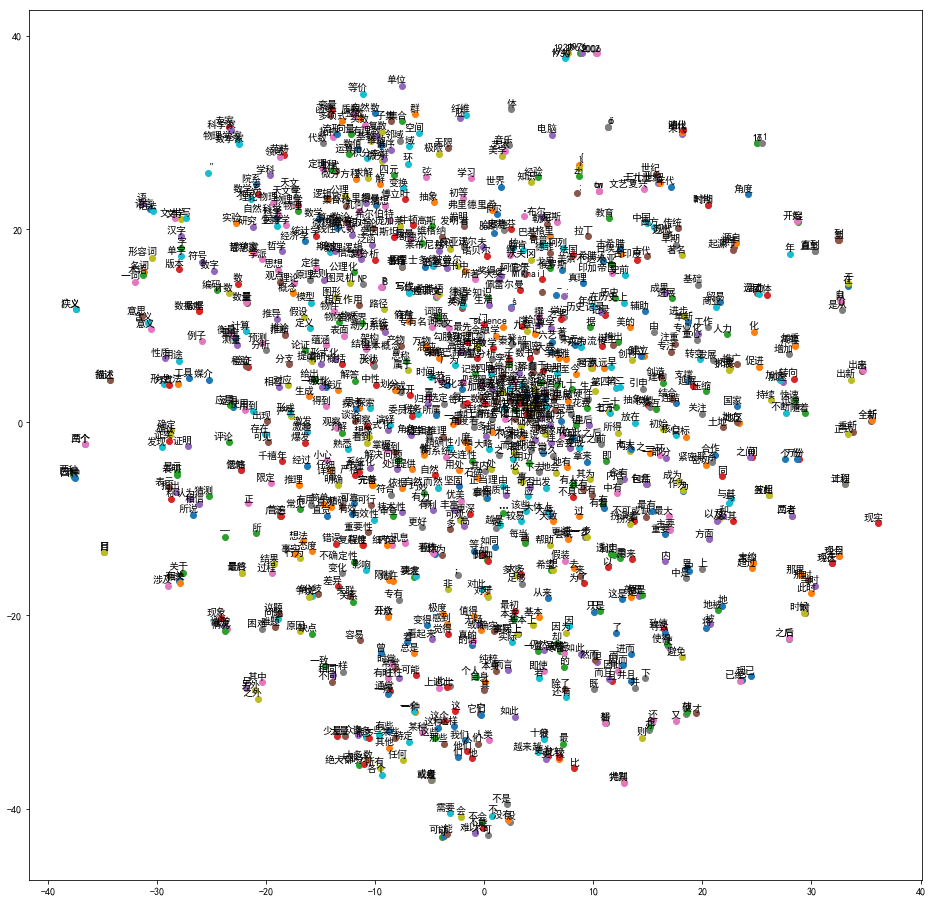

In [15]:
tsne_plot(word_vectors)